# PCA- Principal Component Analysis

![](pic1.png)

![](pic2.png)

# FOR EXAMPLE-HOUSING SAMPLE

1. More variance ; More loss

![](pic3.png)

2. Less Variance ; Less Loss

var(PC1)>var(PC2)

![](pic4.png)

# Math behind PCA

1. COST FUNCTION

![](pic5.png)

2. Eigen vectors:

![](pic6.png)

1. Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from numpy.linalg import eig 

2. Taking sample data for implementation

In [2]:
Marks = np.array([[4,11], [8,4], [13,5], [7,14]])
print(Marks)

[[ 4 11]
 [ 8  4]
 [13  5]
 [ 7 14]]


In [3]:
Marks_df = pd.DataFrame(Marks,columns=["Physics","Maths"])
Marks_df

,Physics,Maths
0,4,11
1,8,4
2,13,5
3,7,14


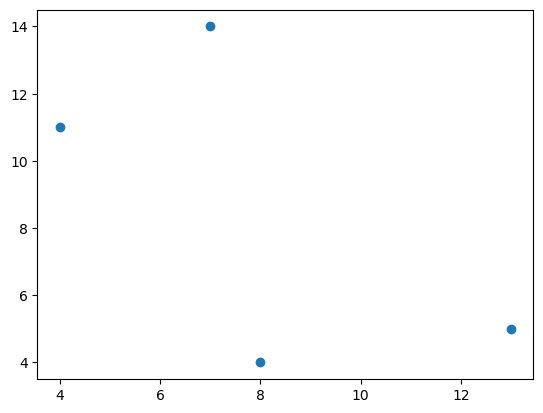

In [4]:
plt.scatter(Marks_df["Physics"],Marks_df["Maths"])

3. Find Data mean centric

In [5]:
Mean = np.mean(Marks.T, axis=1)
print(Mean)

Scaled_Data = Marks-Mean

[8.  8.5]


In [6]:
Scaled_Data

array([[-4. ,  2.5],
       [ 0. , -4.5],
       [ 5. , -3.5],
       [-1. ,  5.5]])

4. Covariance matrix

In [7]:
Cov_matrix = np.cov(Scaled_Data.T)
Cov_matrix

array([[ 14., -11.],
       [-11.,  23.]])

5. Eigen value and Eigen vector of above cov matrix

In [8]:
E_val,E_vec = eig(Cov_matrix)
print(E_val)
print("---------------------------------")
print(E_vec)

[ 6.61513568 30.38486432]
---------------------------------
[[-0.83025082  0.55738997]
 [-0.55738997 -0.83025082]]


6. Original Data Projected to Principle Components as new axis

In [9]:
Projected_Data = E_vec.T.dot(Scaled_Data.T)
print(Projected_Data.T)

[[ 1.92752836 -4.30518692]
 [ 2.50825486  3.73612869]
 [-2.20038921  5.69282771]
 [-2.23539401 -5.12376947]]


7. PCA

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(Marks)

array([[-4.30518692,  1.92752836],
       [ 3.73612869,  2.50825486],
       [ 5.69282771, -2.20038921],
       [-5.12376947, -2.23539401]])

In [11]:
pca.explained_variance_ratio_

array([0.82121255, 0.17878745])

8. DataFrame for PC

In [12]:
PC_DF = pd.DataFrame(data = pca.fit_transform(Marks), columns=['PC1','PC2'])
PC_DF

,PC1,PC2
0,-4.305187,1.927528
1,3.736129,2.508255
2,5.692828,-2.200389
3,-5.123769,-2.235394
